first, lets make a dataset, $y_i=e^{-w_1x_{i1}-w_2x_{i2}+b}$

In [282]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
list1=[]
list2=[]
for i in range(-99,100,2):
    list1.append(i)
    prob=1/(1+np.exp(-0.04*i))
    # print(i,prob,end=' ')
    if(random.random()<prob):
        # print(1)
        list2.append(1)
    else:
        # print(0)
        list2.append(0) ## true weight w=0.03

This is our dataset\
First we start with batch gradient descent, for each epoch, we take batches of 20, and use it to optimise our weights with the loss function\
$p(y_1,y_2...y_n|w_1,w_2,b)=\prod (p_i^{y_1}(1-p_i)^{1-y_1})$\
where $p_i=\frac 1 {1+e^{-wx^T+b}}$\
$d(-log(p(y)))/dw=\sum(\frac {-e^{-wx^T+b}}{1+e^{-wx^T+b}}x_{i}+(1-y_i)x_{i})$\
$d(-log(p(y)))/db=\sum(\frac {e^{-wx^T+b}}{1+e^{-wx^T+b}}-(1-y_i))$\
We use these three as the gradients for our gradient descent.

In [284]:
def batchgradientdescent(x,y,index,weight,L):
    grad_w=0
    for i in range(len(x)):
        coeff=np.exp(-weight*x[i])/(1+np.exp(-weight*x[i]))
        grad_w+=-coeff*x[i]+(1-y[i])*x[i]
    grad_w/=len(x)
    weight=max(weight-grad_w*L,0)
    return weight

In [285]:
weight=0
epochs=12000
L=10**(-5)
index=0
x=np.array(list1)
y=np.array(list2)

In [286]:
for i in range(epochs):
    weight=batchgradientdescent(x,y,index,weight,L)
print(weight)

0.03413596115383517


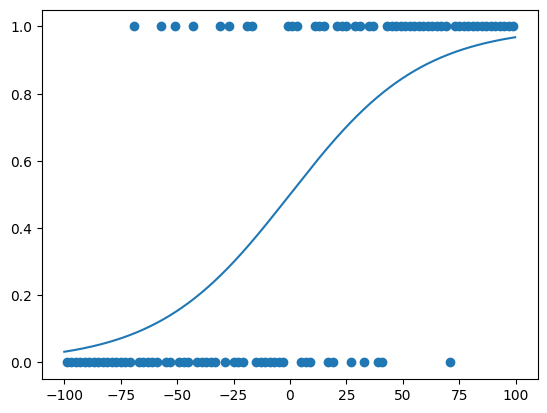

In [287]:
def sigmoid(x):
    a=[]
    for i in x:
        a.append(1/(1+np.exp(-weight*i)))
    return a
plt.scatter(x,y)
list4 = np.arange(-100., 100., 0.2)
list5=sigmoid(list4)
plt.plot(list4,list5)
plt.show()

Now, time for fisher scoring.\
$\beta^{(t+1)}=\beta^{(t)}+s\sum (p_i(1-p_i)x_i)^{-1}(y_i-p_i)$\
$p^{(t)}=\frac {e^{x^T\beta}} {1+e^{x^T\beta}}$\
This gives\
$\beta^{(t+1)}=\beta^{(t)}+s\sum (\frac {x_ie^{x^T\beta}} {(1+e^{x^T\beta})^2})^{-1}(y_i-p_i)$

In [288]:
beta=0.01
s=0.001
epochs=1000

In [289]:
def fisher_scoring(x,y,beta,s):
    sum=0
    for i in range(len(x)):
        p=np.exp(x[i]*beta)/(1+np.exp(x[i]*beta))
        sum+=(y[i]-p)/(p*(1-p)*x[i])
    beta+=s*sum
    return beta

In [290]:
for i in range(epochs):
    beta=fisher_scoring(x,y,beta,s)
beta

0.04566573525659118

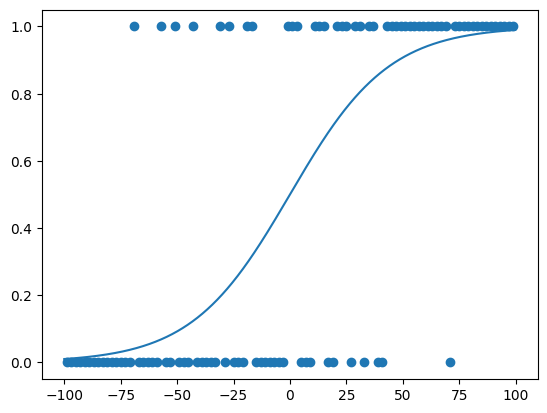

In [291]:
def sigmoid(x):
    a=[]
    for i in x:
        a.append(1/(1+np.exp(-beta*i)))
    return a
plt.scatter(x,y)
list4 = np.arange(-100., 100., 0.2)
list5=sigmoid(list4)
plt.plot(list4,list5)
plt.show()

## Comparing the results
As the Dataset produced is inaccurate and can vary, the accuracy of the models cannot be judged to a precise extent, however they produce good results and seem to converge near the original value which was given (the original value might not be the actual best fit for the generated dataset due to the randomness). However, their convergence points differ.\
As for the convergence rate, batch gradient descent takes around 12000 epochs and an approximate time of 2s or more looping the dataset 12000 times to get stable convergence.\
On the other hand, the fisher scoring method seems to converge much faster, taking only 1000 epochs, and runs for less than 0.1s.\
So, in terms of speed and convergence rate, newton's method seems to work better than batch gradient descent